In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados

In [2]:
aeronaves=pd.read_csv('Dados/aeronave_2010_2020.csv', sep = ';', low_memory=False)
aeronaves

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,PTNQX,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,...,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,39155,PTLVI,***,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,...,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,39156,PPPTO,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,...,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
3,39158,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
4,39176,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,79802,PRGUF,***,AVIÃO,BOEING COMPANY,737-8EH,B738,JATO,BIMOTOR,70533,...,BRASIL,BRASIL,AVIÃO,REGULAR,SANTOS DUMONT,TANCREDO NEVES,SUBIDA,REGULAR,NENHUM,0
5817,79804,PRAJZ,***,***,BOEING COMPANY,737-48E,B734,JATO,BIMOTOR,65090,...,BRASIL,BRASIL,***,REGULAR,EDUARDO GOMES,VIRACOPOS,DESCIDA,REGULAR,NENHUM,0
5818,79824,PRALA,***,AVIÃO,PIPER AIRCRAFT,PA-25-235,PA25,PISTÃO,MONOMOTOR,1315,...,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,RIO PARANAÍBA,RIO PARANAÍBA,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0
5819,79844,PRJBP,***,HELICÓPTERO,SIKORSKY AIRCRAFT,S-92A,S92,TURBOEIXO,BIMOTOR,12020,...,BRASIL,BRASIL,HELICÓPTERO,TÁXI AÉREO,JACAREPAGUÁ,FORA DE AERODROMO,CRUZEIRO,TÁXI AÉREO,NENHUM,0


In [3]:
print(aeronaves.columns.values)

['codigo_ocorrencia2' 'aeronave_matricula' 'aeronave_operador_categoria'
 'aeronave_tipo_veiculo' 'aeronave_fabricante' 'aeronave_modelo'
 'aeronave_tipo_icao' 'aeronave_motor_tipo' 'aeronave_motor_quantidade'
 'aeronave_pmd' 'aeronave_pmd_categoria' 'aeronave_assentos'
 'aeronave_ano_fabricacao' 'aeronave_pais_fabricante'
 'aeronave_pais_registro' 'aeronave_registro_categoria'
 'aeronave_registro_segmento' 'aeronave_voo_origem' 'aeronave_voo_destino'
 'aeronave_fase_operacao' 'aeronave_tipo_operacao' 'aeronave_nivel_dano'
 'aeronave_fatalidades_total']


### Checando os tipo de cada coluna e se tem valores faltantes

In [4]:
aeronaves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia2           5821 non-null   int64  
 1   aeronave_matricula           5821 non-null   object 
 2   aeronave_operador_categoria  5821 non-null   object 
 3   aeronave_tipo_veiculo        5821 non-null   object 
 4   aeronave_fabricante          5821 non-null   object 
 5   aeronave_modelo              5821 non-null   object 
 6   aeronave_tipo_icao           5821 non-null   object 
 7   aeronave_motor_tipo          5821 non-null   object 
 8   aeronave_motor_quantidade    5821 non-null   object 
 9   aeronave_pmd                 5821 non-null   int64  
 10  aeronave_pmd_categoria       5821 non-null   int64  
 11  aeronave_assentos            5670 non-null   float64
 12  aeronave_ano_fabricacao      5671 non-null   float64
 13  aeronave_pais_fabr

### Checando quantos valores faltantes tem em cada coluna

In [5]:
print("Missing values: ", aeronaves.isnull().sum())

Missing values:  codigo_ocorrencia2               0
aeronave_matricula               0
aeronave_operador_categoria      0
aeronave_tipo_veiculo            0
aeronave_fabricante              0
aeronave_modelo                  0
aeronave_tipo_icao               0
aeronave_motor_tipo              0
aeronave_motor_quantidade        0
aeronave_pmd                     0
aeronave_pmd_categoria           0
aeronave_assentos              151
aeronave_ano_fabricacao        150
aeronave_pais_fabricante         0
aeronave_pais_registro           0
aeronave_registro_categoria      0
aeronave_registro_segmento       0
aeronave_voo_origem              0
aeronave_voo_destino             0
aeronave_fase_operacao           0
aeronave_tipo_operacao           0
aeronave_nivel_dano              0
aeronave_fatalidades_total       0
dtype: int64


In [6]:
print(aeronaves['aeronave_tipo_veiculo'].equals(aeronaves['aeronave_registro_categoria']))
print(aeronaves['aeronave_pmd'].equals(aeronaves['aeronave_pmd_categoria']))

True
True


In [7]:
aeronave_filtrada = aeronaves.drop(['aeronave_operador_categoria', 'aeronave_pais_fabricante', 'aeronave_pais_registro', 'aeronave_registro_categoria', 'aeronave_tipo_operacao', 'aeronave_pmd_categoria', 'aeronave_assentos', 'aeronave_ano_fabricacao'], axis = 1)
aeronave_filtrada

,codigo_ocorrencia2,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,PTNQX,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,SUBSTANCIAL,0
1,39155,PTLVI,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,NENHUM,0
2,39156,PPPTO,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,LEVE,0
3,39158,PRLGJ,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,NENHUM,0
4,39176,PRMAA,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,NENHUM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,79802,PRGUF,AVIÃO,BOEING COMPANY,737-8EH,B738,JATO,BIMOTOR,70533,REGULAR,SANTOS DUMONT,TANCREDO NEVES,SUBIDA,NENHUM,0
5817,79804,PRAJZ,***,BOEING COMPANY,737-48E,B734,JATO,BIMOTOR,65090,REGULAR,EDUARDO GOMES,VIRACOPOS,DESCIDA,NENHUM,0
5818,79824,PRALA,AVIÃO,PIPER AIRCRAFT,PA-25-235,PA25,PISTÃO,MONOMOTOR,1315,AGRÍCOLA,RIO PARANAÍBA,RIO PARANAÍBA,MANOBRA,SUBSTANCIAL,0
5819,79844,PRJBP,HELICÓPTERO,SIKORSKY AIRCRAFT,S-92A,S92,TURBOEIXO,BIMOTOR,12020,TÁXI AÉREO,JACAREPAGUÁ,FORA DE AERODROMO,CRUZEIRO,NENHUM,0


In [8]:
ocorrencia=pd.read_csv('Dados/Ocorrencias_Filtradas.csv', sep = ',', low_memory=False)
ocorrencia

,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,03/01/2010,3,1,2010
1,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010,3,1,2010
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,3,1,2010
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010
4,40324,INCIDENTE,PELOTAS,RS,SBPK,05/01/2010,5,1,2010
...,...,...,...,...,...,...,...,...,...
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,29/12/2020,29,12,2020
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020,30,12,2020
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30/12/2020,30,12,2020
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,****,31/12/2020,31,12,2020


### Renomeando a primeira coluna para dar o merge com o outro arquivo

In [9]:
ocorrencias_new = ocorrencia.rename(columns={'codigo_ocorrencia1': 'codigo_ocorrencia2'})
ocorrencias_new

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,03/01/2010,3,1,2010
1,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010,3,1,2010
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,3,1,2010
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010
4,40324,INCIDENTE,PELOTAS,RS,SBPK,05/01/2010,5,1,2010
...,...,...,...,...,...,...,...,...,...
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,29/12/2020,29,12,2020
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020,30,12,2020
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30/12/2020,30,12,2020
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,****,31/12/2020,31,12,2020


# Juntando os 2 dados, de ocorrências e das aeronaves

In [10]:
merge_aeronaves = pd.merge(ocorrencias_new, aeronave_filtrada, on=['codigo_ocorrencia2'])
merge_aeronaves

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano,aeronave_matricula,...,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,03/01/2010,3,1,2010,PRCHE,...,S76,TURBOEIXO,BIMOTOR,5307,TÁXI AÉREO,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,NENHUM,0
1,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010,3,1,2010,PRMAB,...,A320,JATO,BIMOTOR,70000,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,LEVE,0
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,3,1,2010,PRMBW,...,A319,JATO,BIMOTOR,75500,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,LEVE,0
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010,PTURT,...,IPAN,PISTÃO,MONOMOTOR,1800,PARTICULAR,FAZENDA IRMÃOS MUNARETTO,FAZENDA IRMÃOS MUNARETTO,VOO A BAIXA ALTURA,SUBSTANCIAL,0
4,40324,INCIDENTE,PELOTAS,RS,SBPK,05/01/2010,5,1,2010,PPPSB,...,E120,TURBOÉLICE,BIMOTOR,11990,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,TÁXI,NENHUM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,79804,INCIDENTE,CAMPINAS,SP,SBKP,29/12/2020,29,12,2020,PRAJZ,...,B734,JATO,BIMOTOR,65090,REGULAR,EDUARDO GOMES,VIRACOPOS,DESCIDA,NENHUM,0
5817,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020,30,12,2020,PTGZR,...,IPAN,PISTÃO,MONOMOTOR,1800,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,LEVE,0
5818,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30/12/2020,30,12,2020,PRGUF,...,B738,JATO,BIMOTOR,70533,REGULAR,SANTOS DUMONT,TANCREDO NEVES,SUBIDA,NENHUM,0
5819,79756,INCIDENTE GRAVE,VICENTINA,MS,****,31/12/2020,31,12,2020,PTGUP,...,IPAN,PISTÃO,MONOMOTOR,1800,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,LEVE,0


In [11]:
merge_aeronaves.to_csv('Dados/Ocorrencias_Aeronaves.csv', index=False)

In [80]:
merge_aeronaves.columns

Index(['codigo_ocorrencia2', 'ocorrencia_classificacao', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_aerodromo', 'ocorrencia_dia', 'Dia', 'Mes',
       'Ano', 'aeronave_matricula', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino', 'aeronave_fase_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total'],
      dtype='object')

In [81]:
merge_aeronaves.aeronave_tipo_veiculo.value_counts()

AVIÃO          4683
HELICÓPTERO     654
ULTRALEVE       333
***             110
PLANADOR         19
ANFÍBIO          13
TRIKE             5
DIRIGÍVEL         2
BALÃO             1
HIDROAVIÃO        1
Name: aeronave_tipo_veiculo, dtype: int64

In [82]:
labels = merge_aeronaves.aeronave_tipo_veiculo.value_counts().index.tolist()
labels

['AVIÃO',
 'HELICÓPTERO',
 'ULTRALEVE',
 '***',
 'PLANADOR',
 'ANFÍBIO',
 'TRIKE',
 'DIRIGÍVEL',
 'BALÃO',
 'HIDROAVIÃO']

### Concatenando os tipos de veículos como outros

In [83]:
new_labels = [labels[0], labels[1], labels[2], 'OUTRO']
new_labels

['AVIÃO', 'HELICÓPTERO', 'ULTRALEVE', 'OUTRO']

In [87]:
merge_aeronaves.loc[~merge_aeronaves.aeronave_tipo_veiculo.isin(new_labels), 'aeronave_tipo_veiculo'] = 'OUTRO'

In [89]:
merge_aeronaves.aeronave_tipo_veiculo.value_counts()

AVIÃO          4683
HELICÓPTERO     654
ULTRALEVE       333
OUTRO           151
Name: aeronave_tipo_veiculo, dtype: int64

# Panorama da Classificação das ocorrências por Tipo de Veículo

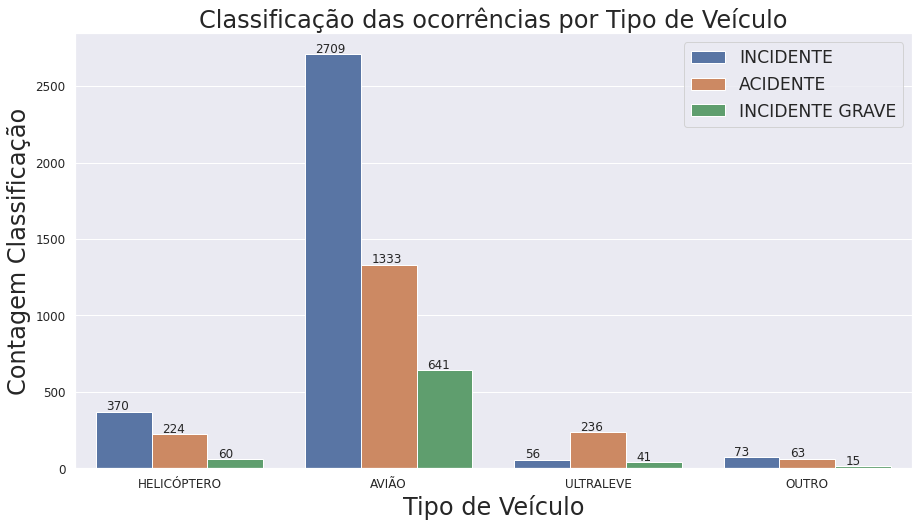

In [124]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=merge_aeronaves.aeronave_tipo_veiculo ,data=merge_aeronaves, hue=merge_aeronaves.ocorrencia_classificacao)
plt.legend(fontsize='x-large')
plt.xlabel("Tipo de Veículo")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências por Tipo de Veículo")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+10))


# Panorama das ocorrências por Tipo de Veículo de acordo com cada ano

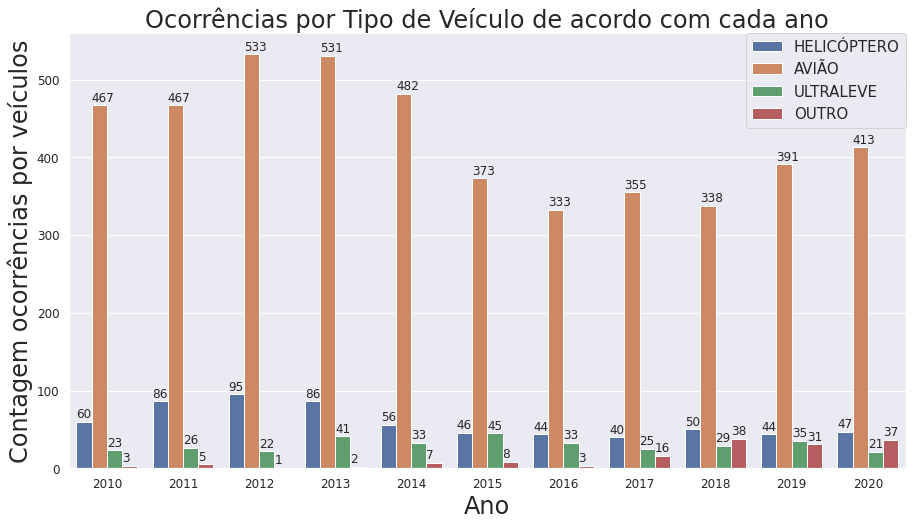

In [135]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=merge_aeronaves.Ano ,data=merge_aeronaves, hue=merge_aeronaves.aeronave_tipo_veiculo)
plt.legend(fontsize='x-large')
plt.xlabel("Ano")
plt.ylabel("Contagem ocorrências por veículos")
plt.title("Ocorrências por Tipo de Veículo de acordo com cada ano")
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., prop={'size': 15})

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+5))


# Separando o dado relacionado aos danos das aeronaves

In [136]:
dano_aeronaves = merge_aeronaves.groupby(['aeronave_nivel_dano', 'ocorrencia_classificacao']).size().reset_index().pivot(columns='ocorrencia_classificacao', index='aeronave_nivel_dano', values=0)
dano_aeronaves

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
aeronave_nivel_dano,,,
***,32.0,15.0,6.0
DESTRUÍDA,350.0,NaN,NaN
LEVE,54.0,1296.0,365.0
NENHUM,27.0,1835.0,192.0
SUBSTANCIAL,1393.0,62.0,194.0


# Panorama dos danos das aeronaves

<Figure size 1080x576 with 0 Axes>

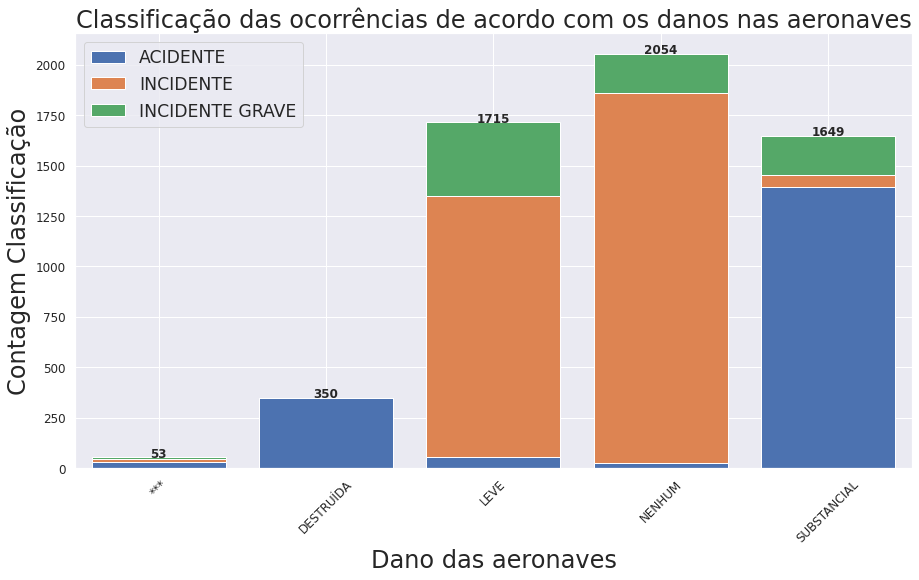

In [139]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = dano_aeronaves.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.legend(fontsize='x-large')
plt.xlabel("Dano das aeronaves")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências de acordo com os danos nas aeronaves")
plt.xticks(rotation=45)

bottom = np.zeros(len(dano_aeronaves))

for i, col in enumerate(dano_aeronaves.columns):
    ax.bar(dano_aeronaves.index, dano_aeronaves[col], bottom=bottom, label=col)
    bottom += np.array(dano_aeronaves[col])

# Somando as linhas dos dados para obter o valor total de cada barra.
totals = dano_aeronaves.sum(axis=1)

# Add labels to each bar.
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + 1, round(total), ha='center',
          weight='bold')

plt.show()

# Panorama dos danos das Aeronaves por Ano

In [143]:
destruida = merge_aeronaves.loc[merge_aeronaves['aeronave_nivel_dano'] == 'DESTRUÍDA']
leve = merge_aeronaves.loc[merge_aeronaves['aeronave_nivel_dano'] == 'LEVE']
substancial = merge_aeronaves.loc[merge_aeronaves['aeronave_nivel_dano'] == 'SUBSTANCIAL']
nenhum = merge_aeronaves.loc[merge_aeronaves['aeronave_nivel_dano'] == 'NENHUM']

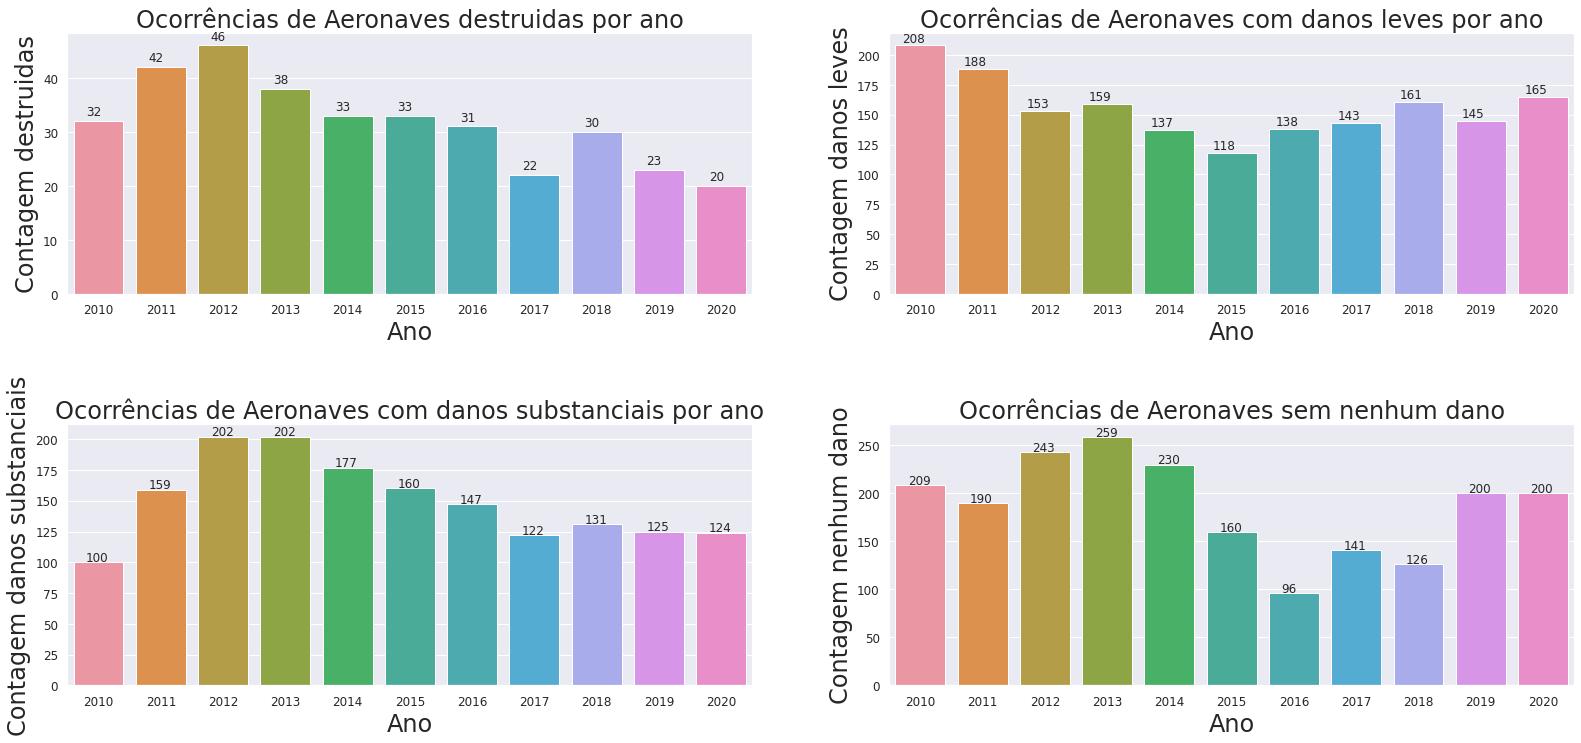

In [157]:
fig = plt.figure(figsize=(27,12))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

plot1 = plt.subplot(2, 2, 1)

ax = sns.countplot(x=destruida.Ano ,data=destruida)
plt.xlabel("Ano")
plt.ylabel("Contagem destruidas")
plt.title("Ocorrências de Aeronaves destruidas por ano")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+1))
        
plot2 = plt.subplot(2, 2, 2)
ax = sns.countplot(x=leve.Ano ,data=leve)
plt.xlabel("Ano")
plt.ylabel("Contagem danos leves")
plt.title("Ocorrências de Aeronaves com danos leves por ano")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+3))

plot3 = plt.subplot(2, 2, 3)
ax = sns.countplot(x=substancial.Ano ,data=substancial)
plt.xlabel("Ano")
plt.ylabel("Contagem danos substanciais")
plt.title("Ocorrências de Aeronaves com danos substanciais por ano")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+1))
        
plot4 = plt.subplot(2, 2, 4)
ax = sns.countplot(x=nenhum.Ano ,data=nenhum)
plt.xlabel("Ano")
plt.ylabel("Contagem nenhum dano")
plt.title("Ocorrências de Aeronaves sem nenhum dano")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+1))

In [156]:
merge_aeronaves.columns

Index(['codigo_ocorrencia2', 'ocorrencia_classificacao', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_aerodromo', 'ocorrencia_dia', 'Dia', 'Mes',
       'Ano', 'aeronave_matricula', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino', 'aeronave_fase_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total'],
      dtype='object')

# Separando o dado relacionado aos fabricantes das aeronaves

In [180]:
fabricantes = merge_aeronaves.aeronave_fabricante.value_counts().head(10)
fabricantes

CESSNA AIRCRAFT                903
NEIVA INDUSTRIA AERONAUTICA    650
EMBRAER                        649
PIPER AIRCRAFT                 412
***                            321
BOEING COMPANY                 306
AIRBUS INDUSTRIE               302
BEECH AIRCRAFT                 292
AEROSPATIALE AND ALENIA        275
AERO BOERO                     198
Name: aeronave_fabricante, dtype: int64

### Selecinando os 10 fabricantes com mais ocorrências

In [181]:
top_10_fabricantes = merge_aeronaves.query('aeronave_fabricante in @fabricantes.index.tolist()')
top_10_fabricantes

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano,aeronave_matricula,...,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
1,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010,3,1,2010,PRMAB,...,A320,JATO,BIMOTOR,70000,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,LEVE,0
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,3,1,2010,PRMBW,...,A319,JATO,BIMOTOR,75500,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,LEVE,0
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010,PTURT,...,IPAN,PISTÃO,MONOMOTOR,1800,PARTICULAR,FAZENDA IRMÃOS MUNARETTO,FAZENDA IRMÃOS MUNARETTO,VOO A BAIXA ALTURA,SUBSTANCIAL,0
4,40324,INCIDENTE,PELOTAS,RS,SBPK,05/01/2010,5,1,2010,PPPSB,...,E120,TURBOÉLICE,BIMOTOR,11990,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,TÁXI,NENHUM,0
5,39807,INCIDENTE,SALVADOR,BA,****,06/01/2010,6,1,2010,PTBXF,...,C150,PISTÃO,MONOMOTOR,726,INSTRUÇÃO,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,LEVE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,79769,INCIDENTE GRAVE,MANOEL URBANO,AC,SIMB,29/12/2020,29,12,2020,PTOCN,...,P28R,PISTÃO,MONOMOTOR,1247,PARTICULAR,SANTA ROSA DO PURUS,MANUEL URBANO,POUSO,***,0
5816,79804,INCIDENTE,CAMPINAS,SP,SBKP,29/12/2020,29,12,2020,PRAJZ,...,B734,JATO,BIMOTOR,65090,REGULAR,EDUARDO GOMES,VIRACOPOS,DESCIDA,NENHUM,0
5817,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020,30,12,2020,PTGZR,...,IPAN,PISTÃO,MONOMOTOR,1800,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,LEVE,0
5818,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30/12/2020,30,12,2020,PRGUF,...,B738,JATO,BIMOTOR,70533,REGULAR,SANTOS DUMONT,TANCREDO NEVES,SUBIDA,NENHUM,0


In [182]:
fabricantes_aeronaves = top_10_fabricantes.groupby(['aeronave_fabricante', 'ocorrencia_classificacao']).size().reset_index().pivot(columns='ocorrencia_classificacao', index='aeronave_fabricante', values=0)
fabricantes_aeronaves

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
aeronave_fabricante,,,
***,198,81,42
AERO BOERO,55,85,58
AEROSPATIALE AND ALENIA,5,256,14
AIRBUS INDUSTRIE,6,284,12
BEECH AIRCRAFT,90,150,52
BOEING COMPANY,4,285,17
CESSNA AIRCRAFT,338,428,137
EMBRAER,121,456,72
NEIVA INDUSTRIA AERONAUTICA,346,190,114


# Panorama Ocorrências por fabricantes das aeronaves

<Figure size 1080x576 with 0 Axes>

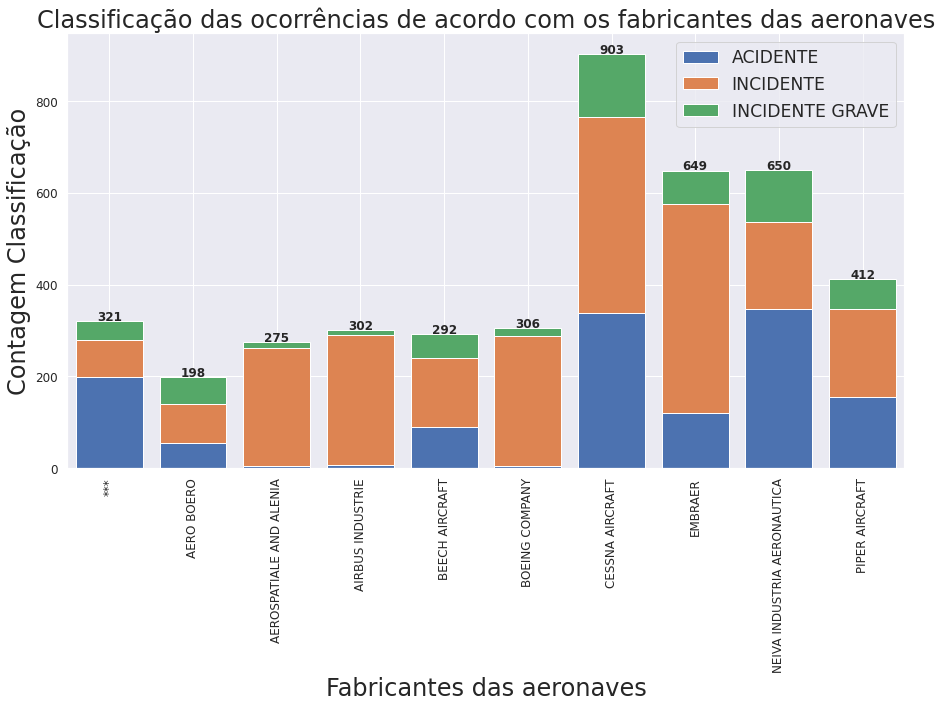

In [184]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = fabricantes_aeronaves.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.legend(fontsize='x-large')
plt.xlabel("Fabricantes das aeronaves")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências de acordo com os fabricantes das aeronaves")
plt.xticks(rotation=90)

bottom = np.zeros(len(fabricantes_aeronaves))

for i, col in enumerate(fabricantes_aeronaves.columns):
    ax.bar(fabricantes_aeronaves.index, fabricantes_aeronaves[col], bottom=bottom, label=col)
    bottom += np.array(fabricantes_aeronaves[col])

# Somando as linhas dos dados para obter o valor total de cada barra.
totals = fabricantes_aeronaves.sum(axis=1)

# Add labels to each bar.
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + 1, round(total), ha='center',
          weight='bold')

plt.show()

# Separando o dado relacionado aos modelos das aeronaves de acordo com a nomenclatura icao (International Civil Aviation Organization)

In [196]:
modelos = merge_aeronaves.aeronave_tipo_icao.value_counts().head(10)
modelos

PA34    421
IPAN    316
ULAC    311
E190    230
***     224
AT72    195
AB11    178
A320    175
C152    128
AS50    128
Name: aeronave_tipo_icao, dtype: int64

### Selecinando os 10 modelos com mais ocorrências

In [197]:
top_10_modelos = merge_aeronaves.query('aeronave_tipo_icao in @modelos.index.tolist()')
top_10_modelos

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano,aeronave_matricula,...,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
1,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010,3,1,2010,PRMAB,...,A320,JATO,BIMOTOR,70000,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,LEVE,0
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010,PTURT,...,IPAN,PISTÃO,MONOMOTOR,1800,PARTICULAR,FAZENDA IRMÃOS MUNARETTO,FAZENDA IRMÃOS MUNARETTO,VOO A BAIXA ALTURA,SUBSTANCIAL,0
7,39707,INCIDENTE GRAVE,CANUTAMA,AM,****,09/01/2010,9,1,2010,PTEVH,...,PA34,PISTÃO,BIMOTOR,2073,PARTICULAR,EDUARDO GOMES,LÁBREA,CRUZEIRO,LEVE,0
8,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,10/01/2010,10,1,2010,PPPTO,...,AT72,TURBOÉLICE,BIMOTOR,22500,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,LEVE,0
10,39789,INCIDENTE,SÃO PEDRO DO SUL,RS,****,10/01/2010,10,1,2010,PTGPL,...,IPAN,PISTÃO,MONOMOTOR,1800,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,CHEQUE DE MOTOR OU ROTOR,LEVE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,79754,INCIDENTE GRAVE,NOVA MARINGÁ,MT,****,28/12/2020,28,12,2020,PTBYA,...,IPAN,PISTÃO,MONOMOTOR,1900,AGRÍCOLA,***,FORA DE AERODROMO,CORRIDA APÓS POUSO,LEVE,0
5811,79800,INCIDENTE,SÃO PAULO,SP,SBMT,28/12/2020,28,12,2020,PRURN,...,PA34,PISTÃO,BIMOTOR,2155,PARTICULAR,CARLOS ALBERTO DA COSTA NEVES,CAMPO DE MARTE,POUSO,NENHUM,0
5813,79753,INCIDENTE GRAVE,GOIATUBA,GO,****,29/12/2020,29,12,2020,PTUPT,...,IPAN,PISTÃO,MONOMOTOR,1800,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,LEVE,0
5817,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020,30,12,2020,PTGZR,...,IPAN,PISTÃO,MONOMOTOR,1800,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,LEVE,0


In [198]:
aeronave_modelo = top_10_modelos.groupby(['aeronave_tipo_icao', 'ocorrencia_classificacao']).size().reset_index().pivot(columns='ocorrencia_classificacao', index='aeronave_tipo_icao', values=0)
aeronave_modelo

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
aeronave_tipo_icao,,,
***,93.0,109.0,22.0
A320,1.0,168.0,6.0
AB11,49.0,80.0,49.0
AS50,47.0,67.0,14.0
AT72,1.0,183.0,11.0
C152,24.0,83.0,21.0
E190,NaN,223.0,7.0
IPAN,258.0,16.0,42.0
PA34,84.0,261.0,76.0


### Substituindo os NaN por 0

In [200]:
aeronave_modelo = aeronave_modelo.fillna(0)
aeronave_modelo

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
aeronave_tipo_icao,,,
***,93.0,109.0,22.0
A320,1.0,168.0,6.0
AB11,49.0,80.0,49.0
AS50,47.0,67.0,14.0
AT72,1.0,183.0,11.0
C152,24.0,83.0,21.0
E190,0.0,223.0,7.0
IPAN,258.0,16.0,42.0
PA34,84.0,261.0,76.0


# Panorama Ocorrências por modelos das aeronaves

<Figure size 1080x576 with 0 Axes>

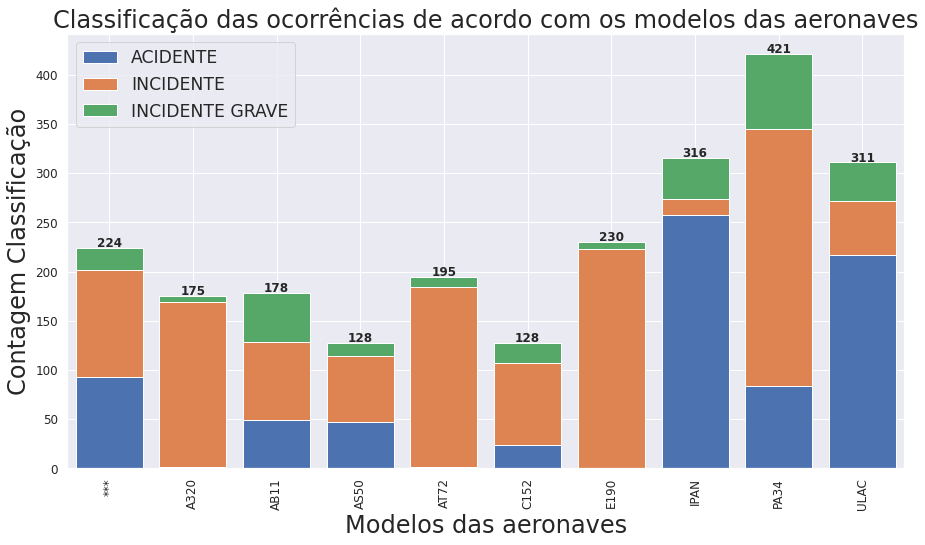

In [201]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = aeronave_modelo.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.legend(fontsize='x-large')
plt.xlabel("Modelos das aeronaves")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências de acordo com os modelos das aeronaves")
plt.xticks(rotation=90)

bottom = np.zeros(len(aeronave_modelo))

for i, col in enumerate(aeronave_modelo.columns):
    ax.bar(aeronave_modelo.index, aeronave_modelo[col], bottom=bottom, label=col)
    bottom += np.array(aeronave_modelo[col])

# Somando as linhas dos dados para obter o valor total de cada barra.
totals = aeronave_modelo.sum(axis=1)

# Add labels to each bar.
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + 1, round(total), ha='center',
          weight='bold')

plt.show()

# Separando o dado relacionado ao tipo de motor das aeronaves

In [203]:
motor = merge_aeronaves.aeronave_motor_tipo.value_counts()
motor

PISTÃO        3248
JATO          1124
TURBOÉLICE     718
TURBOEIXO      544
***            168
SEM TRAÇÃO      19
Name: aeronave_motor_tipo, dtype: int64

In [204]:
aeronave_motor = merge_aeronaves.groupby(['aeronave_motor_tipo', 'ocorrencia_classificacao']).size().reset_index().pivot(columns='ocorrencia_classificacao', index='aeronave_motor_tipo', values=0)
aeronave_motor

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
aeronave_motor_tipo,,,
***,70,77,21
JATO,32,1023,69
PISTÃO,1514,1199,535
SEM TRAÇÃO,12,4,3
TURBOEIXO,110,382,52
TURBOÉLICE,118,523,77


# Panorama Ocorrências por motores das aeronaves

<Figure size 1080x576 with 0 Axes>

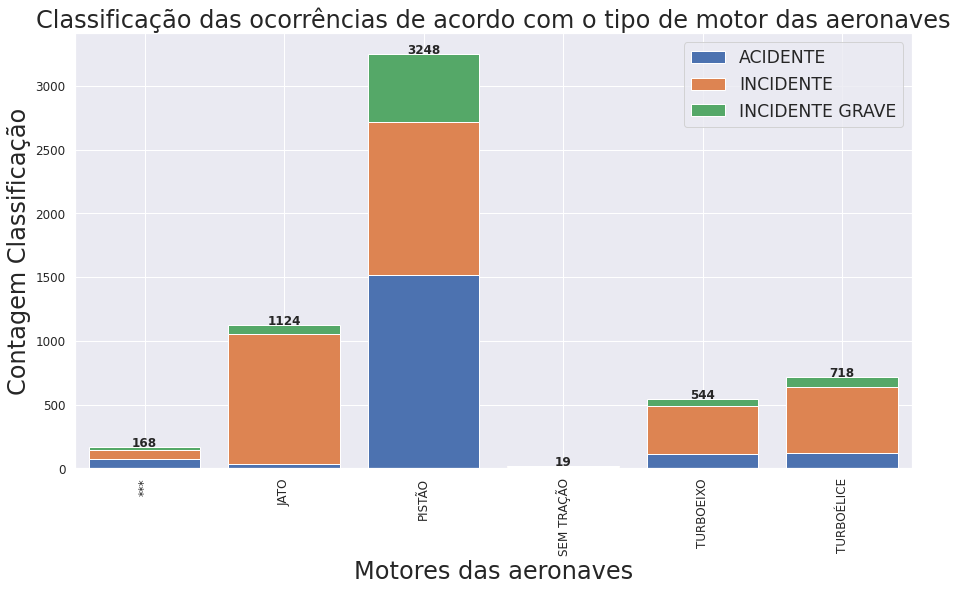

In [210]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = aeronave_motor.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.legend(fontsize='x-large')
plt.xlabel("Motores das aeronaves")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências de acordo com o tipo de motor das aeronaves")
plt.xticks(rotation=90)

bottom = np.zeros(len(aeronave_motor))

for i, col in enumerate(aeronave_motor.columns):
    ax.bar(aeronave_motor.index, aeronave_motor[col], bottom=bottom, label=col)
    bottom += np.array(aeronave_motor[col])

# Somando as linhas dos dados para obter o valor total de cada barra.
totals = aeronave_motor.sum(axis=1)

# Add labels to each bar.
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + 1, round(total), ha='center',
          weight='bold')

plt.show()

# Separando o dado relacionado a quantidade de motores das aeronaves

In [206]:
merge_aeronaves.columns

Index(['codigo_ocorrencia2', 'ocorrencia_classificacao', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_aerodromo', 'ocorrencia_dia', 'Dia', 'Mes',
       'Ano', 'aeronave_matricula', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino', 'aeronave_fase_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total'],
      dtype='object')

In [207]:
quantidade_motor = merge_aeronaves.aeronave_motor_quantidade.value_counts()
quantidade_motor

MONOMOTOR      2959
BIMOTOR        2584
SEM TRAÇÃO      131
TRIMOTOR         75
***              65
QUADRIMOTOR       7
Name: aeronave_motor_quantidade, dtype: int64

In [208]:
aeronave_quantidade_motor = merge_aeronaves.groupby(['aeronave_motor_quantidade', 'ocorrencia_classificacao']).size().reset_index().pivot(columns='ocorrencia_classificacao', index='aeronave_motor_quantidade', values=0)
aeronave_quantidade_motor

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
aeronave_motor_quantidade,,,
***,29.0,32.0,4.0
BIMOTOR,265.0,2045.0,274.0
MONOMOTOR,1504.0,999.0,456.0
QUADRIMOTOR,NaN,6.0,1.0
SEM TRAÇÃO,57.0,53.0,21.0
TRIMOTOR,1.0,73.0,1.0


### Substituindo os NaN por 0

In [209]:
aeronave_quantidade_motor = aeronave_quantidade_motor.fillna(0)
aeronave_quantidade_motor

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
aeronave_motor_quantidade,,,
***,29.0,32.0,4.0
BIMOTOR,265.0,2045.0,274.0
MONOMOTOR,1504.0,999.0,456.0
QUADRIMOTOR,0.0,6.0,1.0
SEM TRAÇÃO,57.0,53.0,21.0
TRIMOTOR,1.0,73.0,1.0


# Panorama Ocorrências por quantidade de motores das aeronaves

<Figure size 1080x576 with 0 Axes>

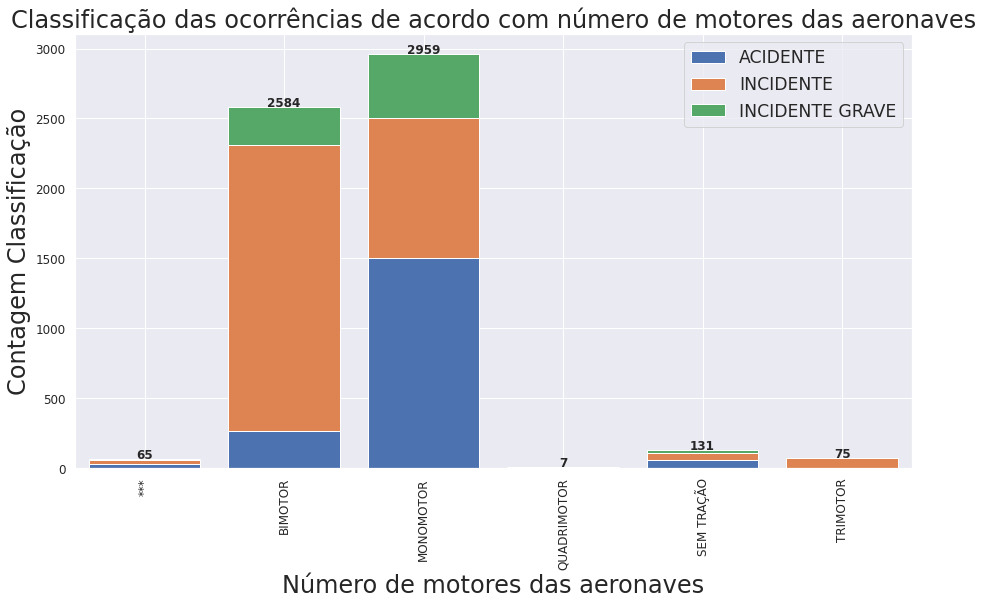

In [211]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = aeronave_quantidade_motor.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.legend(fontsize='x-large')
plt.xlabel("Número de motores das aeronaves")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências de acordo com número de motores das aeronaves")
plt.xticks(rotation=90)

bottom = np.zeros(len(aeronave_quantidade_motor))

for i, col in enumerate(aeronave_quantidade_motor.columns):
    ax.bar(aeronave_quantidade_motor.index, aeronave_quantidade_motor[col], bottom=bottom, label=col)
    bottom += np.array(aeronave_quantidade_motor[col])

# Somando as linhas dos dados para obter o valor total de cada barra.
totals = aeronave_quantidade_motor.sum(axis=1)

# Add labels to each bar.
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + 1, round(total), ha='center',
          weight='bold')

plt.show()

In [212]:
merge_aeronaves.columns

Index(['codigo_ocorrencia2', 'ocorrencia_classificacao', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_aerodromo', 'ocorrencia_dia', 'Dia', 'Mes',
       'Ano', 'aeronave_matricula', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino', 'aeronave_fase_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total'],
      dtype='object')

# Separando a base de acidentes para analisar as suas fatalidades

In [215]:
acidentes = merge_aeronaves.loc[merge_aeronaves['ocorrencia_classificacao'] == 'ACIDENTE']
acidentes

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano,aeronave_matricula,...,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010,PTURT,...,IPAN,PISTÃO,MONOMOTOR,1800,PARTICULAR,FAZENDA IRMÃOS MUNARETTO,FAZENDA IRMÃOS MUNARETTO,VOO A BAIXA ALTURA,SUBSTANCIAL,0
11,40069,ACIDENTE,SÃO PAULO,SP,SBMT,10/01/2010,10,1,2010,PPMAW,...,AS50,TURBOEIXO,MONOMOTOR,2250,PARTICULAR,FORA DE AERODROMO,UNICID - UNIVERSIDADE CIDADE DE SÃO PAULO,PARTIDA DO MOTOR,DESTRUÍDA,0
13,39507,ACIDENTE,PRIMAVERA DO LESTE,MT,****,11/01/2010,11,1,2010,PTUTM,...,IPAN,PISTÃO,MONOMOTOR,1800,AGRÍCOLA,C.T.O. ITAÚ,FORA DE AERODROMO,OUTRA FASE,SUBSTANCIAL,0
14,40107,ACIDENTE,GURUPÁ,PA,SNGU,12/01/2010,12,1,2010,PTEOS,...,PA32,PISTÃO,MONOMOTOR,1542,TÁXI AÉREO,BREVES,GURUPÁ,POUSO,LEVE,0
15,39315,ACIDENTE,CANUTAMA,AM,****,15/01/2010,15,1,2010,PTHLE,...,AS50,TURBOEIXO,MONOMOTOR,1950,TÁXI AÉREO,FORA DE AERODROMO,LÁBREA,CRUZEIRO,***,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,79748,ACIDENTE,SANTANA DO LIVRAMENTO,RS,####,23/12/2020,23,12,2020,PRDBO,...,C188,PISTÃO,MONOMOTOR,1905,AGRÍCOLA,PISTA DE POUSO EVENTUAL,PISTA DE POUSO EVENTUAL,DECOLAGEM,SUBSTANCIAL,0
5808,79749,ACIDENTE,MARITUBA,PA,****,26/12/2020,26,12,2020,PTNPF,...,P28R,PISTÃO,MONOMOTOR,1202,PARTICULAR,BELÉM/BRIGADEIRO PROTÁSIO DE OLIVEIRA,BELÉM/BRIGADEIRO PROTÁSIO DE OLIVEIRA,CRUZEIRO,SUBSTANCIAL,0
5809,79751,ACIDENTE,PRESIDENTE CASTELO BRANCO,PR,SSXO,27/12/2020,27,12,2020,*****,...,***,***,***,0,EXPERIMENTAL,POUSADA DAS ÁGUIAS,POUSADA DAS ÁGUIAS,DECOLAGEM,SUBSTANCIAL,0
5812,79824,ACIDENTE,RIO PARANAÍBA,MG,SNRP,28/12/2020,28,12,2020,PRALA,...,PA25,PISTÃO,MONOMOTOR,1315,AGRÍCOLA,RIO PARANAÍBA,RIO PARANAÍBA,MANOBRA,SUBSTANCIAL,0


In [256]:
fatalidades = acidentes.loc[acidentes['aeronave_fatalidades_total'] != 0]
fatalidades

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano,aeronave_matricula,...,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
15,39315,ACIDENTE,CANUTAMA,AM,****,15/01/2010,15,1,2010,PTHLE,...,AS50,TURBOEIXO,MONOMOTOR,1950,TÁXI AÉREO,FORA DE AERODROMO,LÁBREA,CRUZEIRO,***,2
28,39321,ACIDENTE,PONTES E LACERDA,MT,****,23/01/2010,23,1,2010,PTOHL,...,C210,PISTÃO,MONOMOTOR,1724,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,DESTRUÍDA,1
31,39323,ACIDENTE,CASIMIRO DE ABREU,RJ,****,24/01/2010,24,1,2010,PUMEL,...,ULAC,PISTÃO,MONOMOTOR,430,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,SUBSTANCIAL,1
32,39318,ACIDENTE,SENADOR JOSÉ PORFÍRIO,PA,****,25/01/2010,25,1,2010,PTTAF,...,E110,TURBOÉLICE,BIMOTOR,5600,TÁXI AÉREO,VAL DE CANS / JÚLIO CEZAR RIBEIRO,WILMA REBELO,DESCIDA,SUBSTANCIAL,2
37,39319,ACIDENTE,IPERÓ,SP,****,27/01/2010,27,1,2010,PRUGO,...,PA34,PISTÃO,BIMOTOR,2073,PARTICULAR,SOROCABA,FAZENDA SANTA RITA,SUBIDA,DESTRUÍDA,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5747,79678,ACIDENTE,VILA BELA DA SANTÍSSIMA TRINDADE,MT,****,16/11/2020,16,11,2020,*****,...,***,***,***,0,PARTICULAR,***,***,INDETERMINADA,DESTRUÍDA,1
5767,79697,ACIDENTE,POCONÉ,MT,****,30/11/2020,30,11,2020,PRHEB,...,B06,TURBOEIXO,MONOMOTOR,2018,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,***,SUBSTANCIAL,1
5785,79724,ACIDENTE,ANGRA DOS REIS,RJ,****,11/12/2020,11,12,2020,PPMSA,...,B06,TURBOEIXO,MONOMOTOR,1451,TÁXI AÉREO,FORA DE AERODROMO,FORA DE AERODROMO,APROXIMAÇÃO FINAL,SUBSTANCIAL,1
5796,79743,ACIDENTE,GOIATUBA,GO,****,18/12/2020,18,12,2020,PTGBJ,...,IPAN,PISTÃO,MONOMOTOR,1550,AGRÍCOLA,***,***,CRUZEIRO,SUBSTANCIAL,1


### Colocando a contagem das fatalidades de acordo com cada ano em um dicionário

In [278]:
dicts = {}
for i in range(0,11):
    keys = 2010 + i
    filter_fatalidades = fatalidades.loc[fatalidades['Ano'] == 2010 + i]
    values = sum(filter_fatalidades['aeronave_fatalidades_total'])
    dicts[keys] = values

print(dicts)

{2010: 55, 2011: 110, 2012: 110, 2013: 94, 2014: 80, 2015: 78, 2016: 104, 2017: 54, 2018: 80, 2019: 61, 2020: 50}


In [282]:
sum(dicts.values())

876

# Panorama das fatalidades nas aeronaves de acordo com cada ano

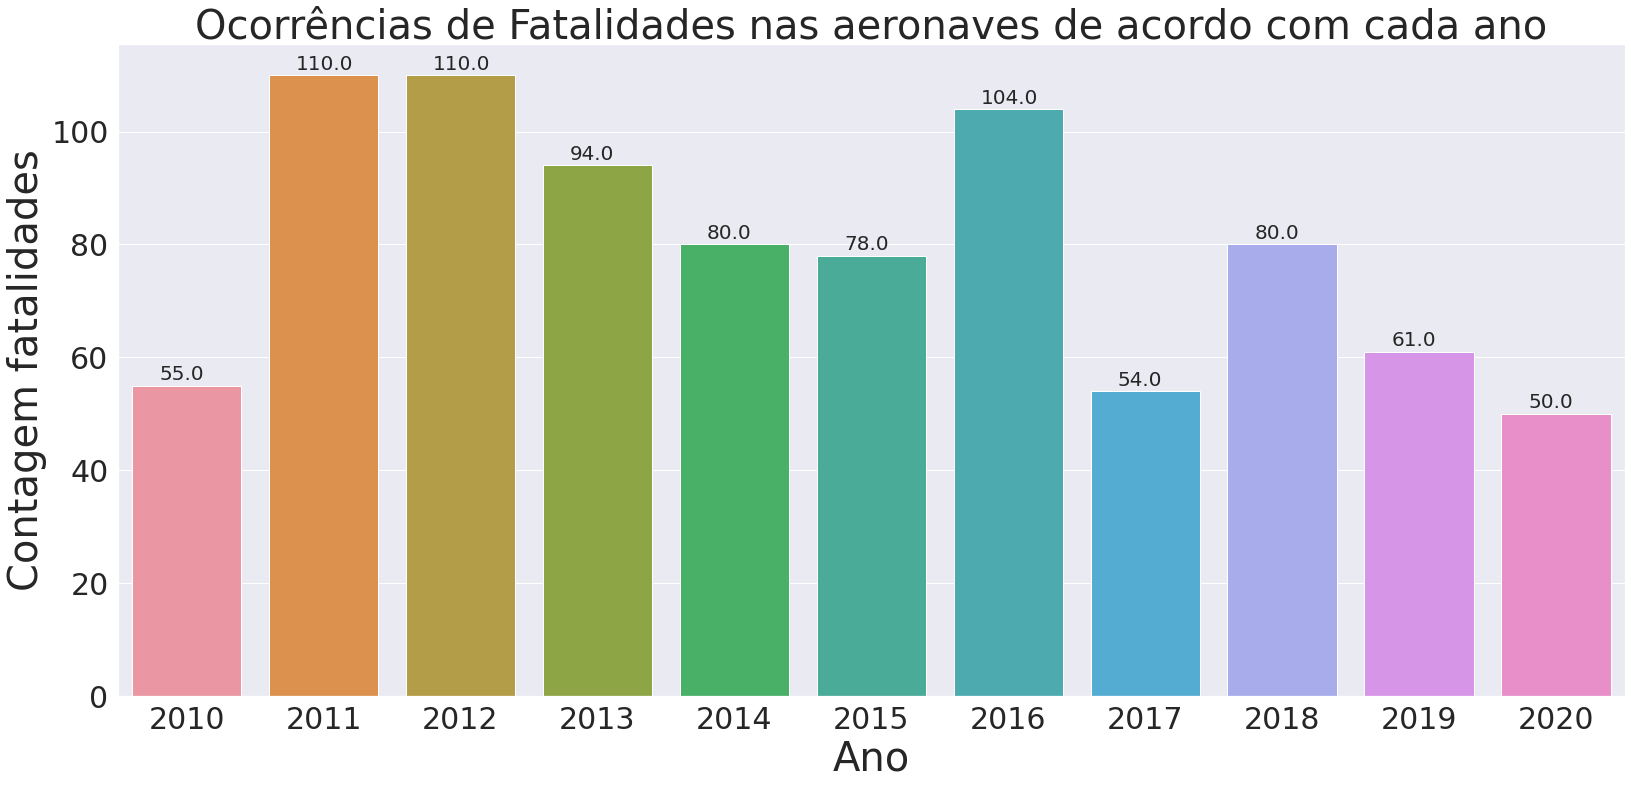

In [281]:
fig = plt.figure(figsize=(27,12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)


my_df = pd.DataFrame(dicts.items())
ax = sns.barplot(x=0, y=1, data=my_df)

plt.xlabel("Ano", fontsize = 40)
plt.ylabel("Contagem fatalidades", fontsize = 40)
plt.title("Ocorrências de Fatalidades nas aeronaves de acordo com cada ano", fontsize = 40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+1), fontsize = 20)

# Verificando as ocorrências de acordo com o ano de fabricação das aeronaves

In [304]:
ano_fabricacao = aeronaves.drop(['aeronave_operador_categoria', 'aeronave_pais_fabricante', 'aeronave_pais_registro', 'aeronave_registro_categoria', 'aeronave_tipo_operacao', 'aeronave_pmd_categoria', 'aeronave_assentos'], axis = 1)
ano_fabricacao

,codigo_ocorrencia2,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_ano_fabricacao,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,PTNQX,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,1979.0,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,SUBSTANCIAL,0
1,39155,PTLVI,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,1979.0,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,NENHUM,0
2,39156,PPPTO,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,2008.0,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,LEVE,0
3,39158,PRLGJ,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,1984.0,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,NENHUM,0
4,39176,PRMAA,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,2001.0,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,NENHUM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,79802,PRGUF,AVIÃO,BOEING COMPANY,737-8EH,B738,JATO,BIMOTOR,70533,2010.0,REGULAR,SANTOS DUMONT,TANCREDO NEVES,SUBIDA,NENHUM,0
5817,79804,PRAJZ,***,BOEING COMPANY,737-48E,B734,JATO,BIMOTOR,65090,NaN,REGULAR,EDUARDO GOMES,VIRACOPOS,DESCIDA,NENHUM,0
5818,79824,PRALA,AVIÃO,PIPER AIRCRAFT,PA-25-235,PA25,PISTÃO,MONOMOTOR,1315,0.0,AGRÍCOLA,RIO PARANAÍBA,RIO PARANAÍBA,MANOBRA,SUBSTANCIAL,0
5819,79844,PRJBP,HELICÓPTERO,SIKORSKY AIRCRAFT,S-92A,S92,TURBOEIXO,BIMOTOR,12020,NaN,TÁXI AÉREO,JACAREPAGUÁ,FORA DE AERODROMO,CRUZEIRO,NENHUM,0


In [306]:
merge_fabricacao = pd.merge(ocorrencias_new, ano_fabricacao, on=['codigo_ocorrencia2'])
merge_fabricacao_filtered = merge_fabricacao[merge_fabricacao['aeronave_ano_fabricacao'].notna()]
merge_fabricacao_filtered

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano,aeronave_matricula,...,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_ano_fabricacao,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,03/01/2010,3,1,2010,PRCHE,...,TURBOEIXO,BIMOTOR,5307,2007.0,TÁXI AÉREO,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,NENHUM,0
1,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010,3,1,2010,PRMAB,...,JATO,BIMOTOR,70000,2001.0,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,LEVE,0
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,3,1,2010,PRMBW,...,JATO,BIMOTOR,75500,2008.0,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,LEVE,0
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010,PTURT,...,PISTÃO,MONOMOTOR,1800,2004.0,PARTICULAR,FAZENDA IRMÃOS MUNARETTO,FAZENDA IRMÃOS MUNARETTO,VOO A BAIXA ALTURA,SUBSTANCIAL,0
4,40324,INCIDENTE,PELOTAS,RS,SBPK,05/01/2010,5,1,2010,PPPSB,...,TURBOÉLICE,BIMOTOR,11990,1995.0,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,TÁXI,NENHUM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5814,79755,ACIDENTE,MATO RICO,PR,****,29/12/2020,29,12,2020,PTKCK,...,PISTÃO,MONOMOTOR,1334,1974.0,PARTICULAR,MANOEL RIBAS,MUNICIPAL DE GUARATUBA,***,DESTRUÍDA,4
5815,79769,INCIDENTE GRAVE,MANOEL URBANO,AC,SIMB,29/12/2020,29,12,2020,PTOCN,...,PISTÃO,MONOMOTOR,1247,0.0,PARTICULAR,SANTA ROSA DO PURUS,MANUEL URBANO,POUSO,***,0
5817,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020,30,12,2020,PTGZR,...,PISTÃO,MONOMOTOR,1800,1984.0,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,LEVE,0
5818,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30/12/2020,30,12,2020,PRGUF,...,JATO,BIMOTOR,70533,2010.0,REGULAR,SANTOS DUMONT,TANCREDO NEVES,SUBIDA,NENHUM,0


### Pegando os 10 anos com mais ocorrências

In [309]:
filter_ano_fabricacao = merge_fabricacao_filtered.aeronave_ano_fabricacao.value_counts().head(11)

In [312]:
filter_ano_fabricacao

0.0       267
2008.0    248
2010.0    242
2009.0    238
2011.0    221
2012.0    220
2007.0    203
1980.0    199
1992.0    165
1978.0    147
1979.0    146
Name: aeronave_ano_fabricacao, dtype: int64

In [314]:
top_10_fabricacoes = filter_ano_fabricacao.index.tolist()[1:]
top_10_fabricacoes

[2008.0,
 2010.0,
 2009.0,
 2011.0,
 2012.0,
 2007.0,
 1980.0,
 1992.0,
 1978.0,
 1979.0]

### Selecionando os 10 anos de fabricação com mais ocorrências

In [327]:
top_10_anos_fabricacoes = merge_fabricacao_filtered.query('aeronave_ano_fabricacao in @top_10_fabricacoes')
top_10_anos_fabricacoes

,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano,aeronave_matricula,...,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_ano_fabricacao,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,03/01/2010,3,1,2010,PRCHE,...,TURBOEIXO,BIMOTOR,5307,2007.0,TÁXI AÉREO,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,NENHUM,0
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,3,1,2010,PRMBW,...,JATO,BIMOTOR,75500,2008.0,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,LEVE,0
7,39707,INCIDENTE GRAVE,CANUTAMA,AM,****,09/01/2010,9,1,2010,PTEVH,...,PISTÃO,BIMOTOR,2073,1979.0,PARTICULAR,EDUARDO GOMES,LÁBREA,CRUZEIRO,LEVE,0
8,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,10/01/2010,10,1,2010,PPPTO,...,TURBOÉLICE,BIMOTOR,22500,2008.0,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,LEVE,0
9,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,****,10/01/2010,10,1,2010,PTZPJ,...,PISTÃO,MONOMOTOR,1452,2009.0,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,SUBSTANCIAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,79785,INCIDENTE,MANAUS,AM,SBEG,19/12/2020,19,12,2020,PPPTN,...,TURBOÉLICE,BIMOTOR,22500,2008.0,REGULAR,EDUARDO GOMES,TEFÉ,CRUZEIRO,NENHUM,0
5802,79759,INCIDENTE,PORTO ALEGRE,RS,SBPA,21/12/2020,21,12,2020,PRTKL,...,TURBOÉLICE,BIMOTOR,22800,2012.0,REGULAR,SALGADO FILHO,CATARATAS,CRUZEIRO,NENHUM,0
5804,79799,INCIDENTE,MUITOS CAPÕES,RS,****,21/12/2020,21,12,2020,PTERL,...,PISTÃO,BIMOTOR,2073,1978.0,PARTICULAR,***,***,CORRIDA APÓS POUSO,NENHUM,0
5818,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30/12/2020,30,12,2020,PRGUF,...,JATO,BIMOTOR,70533,2010.0,REGULAR,SANTOS DUMONT,TANCREDO NEVES,SUBIDA,NENHUM,0


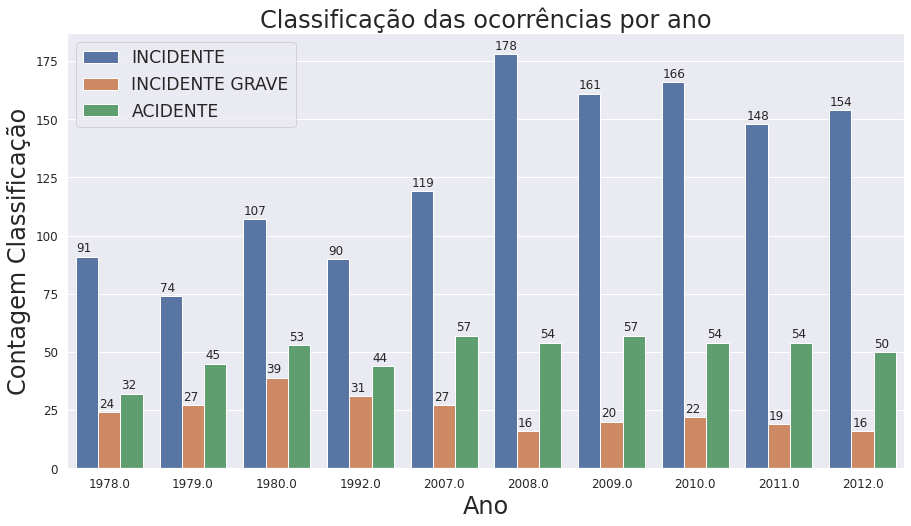

In [331]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=top_10_anos_fabricacoes.aeronave_ano_fabricacao ,data=top_10_anos_fabricacoes, hue=top_10_anos_fabricacoes.ocorrencia_classificacao)
plt.legend(fontsize='x-large')
plt.xlabel("Ano")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências por ano")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+2))


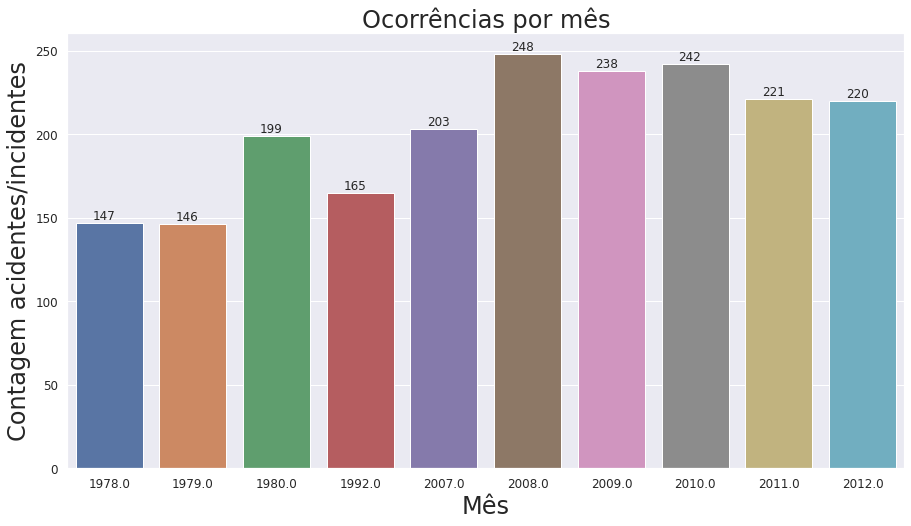

In [330]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=top_10_anos_fabricacoes.aeronave_ano_fabricacao ,data=top_10_anos_fabricacoes)
plt.xlabel("Mês")
plt.ylabel("Contagem acidentes/incidentes")
plt.title("Ocorrências por mês")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+2))